In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier

In [2]:

class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        data = pd.DataFrame(X)
        data['target'] = y
        self.tree = self._fit(data)

    def _fit(self, data, depth=0):
        if depth == self.max_depth or data['target'].nunique() == 1:
            return {'class': data['target'].mode().iloc[0]}

        split_column, split_value = self._find_best_split(data)

        if split_column is None:
            return {'class': data['target'].mode().iloc[0]}

        left_data = data[data[split_column] <= split_value]
        right_data = data[data[split_column] > split_value]

        left_tree = self._fit(left_data, depth + 1)
        right_tree = self._fit(right_data, depth + 1)

        return {'column': split_column, 'value': split_value,
                'left': left_tree, 'right': right_tree}

    def _find_best_split(self, data):
        features = data.columns[:-1]
        best_split_column = None
        best_split_value = None
        best_gini = 1.0 

        for feature in features:
            values = data[feature].unique()
            for value in values:
                left_data = data[data[feature] <= value]
                right_data = data[data[feature] > value]

                gini = self._calculate_gini(left_data, right_data)

                if gini < best_gini:
                    best_gini = gini
                    best_split_column = feature
                    best_split_value = value

        return best_split_column, best_split_value

    def _calculate_gini(self, left_data, right_data):
        left_size = len(left_data)
        right_size = len(right_data)
        total_size = left_size + right_size

        if total_size == 0:
            return 0

        p_left = left_size / total_size
        p_right = right_size / total_size

        gini_left = 1 - sum((left_data['target'].value_counts() / left_size) ** 2)
        gini_right = 1 - sum((right_data['target'].value_counts() / right_size) ** 2)

        gini = p_left * gini_left + p_right * gini_right

        return gini
    
    def _calculate_entropy(self, left_y, right_y):
        left_size = len(left_y)
        right_size = len(right_y)
        total_size = left_size + right_size

        if total_size == 0:
            return 0

        p_left = left_size / total_size
        p_right = right_size / total_size

        entropy_left = -sum((np.sum(left_y == c) / left_size) * np.log2(np.sum(left_y == c) / left_size)
                            for c in np.unique(left_y) if np.sum(left_y == c) > 0)

        entropy_right = -sum((np.sum(right_y == c) / right_size) * np.log2(np.sum(right_y == c) / right_size)
                             for c in np.unique(right_y) if np.sum(right_y == c) > 0)

        entropy = p_left * entropy_left + p_right * entropy_right
        return entropy

    def predict(self, X):
        X = pd.DataFrame(X)
        predictions = []
        for _, row in X.iterrows():
            predictions.append(self._predict_single(row, self.tree))
        return predictions

    def _predict_single(self, instance, tree):
        if 'class' in tree:
            return tree['class']
        if instance[tree['column']] <= tree['value']:
            return self._predict_single(instance, tree['left'])
        else:
            return self._predict_single(instance, tree['right'])

In [3]:
# Load the dataset
df = pd.read_csv('Q1Data.csv')

class_mapping = {label: idx for idx,
                 label in enumerate(np.unique(df['Genus']))}

df['Genus'] = df['Genus'].map(class_mapping)

X = df.iloc[:, :6].values
y = df['Genus'].values


Accuracy (Scratch) for max_depth = 1: 0.6926685198054204
Accuracy (Sklearn) for max_depth = 1: 0.6990965948575399
Accuracy (Scratch) for max_depth = 2: 0.7705003474635164
Accuracy (Sklearn) for max_depth = 2: 0.7824878387769284
Accuracy (Scratch) for max_depth = 3: 0.813238359972203
Accuracy (Sklearn) for max_depth = 3: 0.8332175121612231
Accuracy (Scratch) for max_depth = 4: 0.8439888811674774
Accuracy (Sklearn) for max_depth = 4: 0.8492008339124392
Accuracy (Scratch) for max_depth = 5: 0.840687977762335
Accuracy (Sklearn) for max_depth = 5: 0.8707435719249479
Accuracy (Scratch) for max_depth = 6: 0.8563238359972203
Accuracy (Sklearn) for max_depth = 6: 0.886726893676164
Accuracy (Scratch) for max_depth = 7: 0.8707435719249479
Accuracy (Sklearn) for max_depth = 7: 0.901320361362057
Accuracy (Scratch) for max_depth = 8: 0.8775191104933981
Accuracy (Sklearn) for max_depth = 8: 0.9173036831132731
Accuracy (Scratch) for max_depth = 9: 0.878735232800556
Accuracy (Sklearn) for max_depth = 9

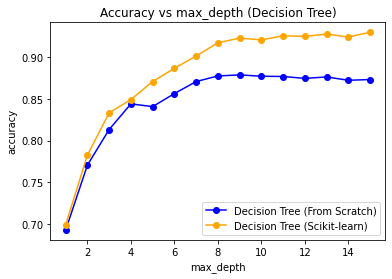

In [5]:

# Train Decision Tree Classifier

depth_accuracy_scratch = []
depth_accuracy_sklearn = []

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, train_size=0.2, random_state=42)


X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(
    X, y, test_size=0.2, train_size=0.8, random_state=42)

for i in range(1, 16):
    model = DecisionTreeClassifierScratch(max_depth=i)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    depth_accuracy_scratch.append((i, accuracy))
    print(f'Accuracy (Scratch) for max_depth = {i}: {accuracy}')

    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train_sk, y_train_sk)
    y_pred = model.predict(X_test_sk)
    accuracy = accuracy_score(y_test_sk, y_pred)
    depth_accuracy_sklearn.append((i, accuracy))
    print(f'Accuracy (Sklearn) for max_depth = {i}: {accuracy}')

depth_accuracy_scratch = np.array(depth_accuracy_scratch)
depth_accuracy_sklearn = np.array(depth_accuracy_sklearn)

plt.plot(depth_accuracy_scratch[:, 0], depth_accuracy_scratch[:, 1],
         label='Decision Tree (From Scratch)', marker='o', linestyle='-', color='blue')
plt.plot(depth_accuracy_sklearn[:, 0], depth_accuracy_sklearn[:, 1],
         label='Decision Tree (Scikit-learn)', marker='o', linestyle='-', color='orange')


plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Accuracy vs max_depth (Decision Tree)')
plt.legend()
plt.show()

from above plot we can see that Decision Tree Classifier build from scratch is performing slightly worse than the sklearn Decision Tree Classifier. This is because sklearn Decision Tree Classifier uses some more advanced techniques to avoid overfitting.

# KNN

In [6]:
class KNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict_single(x) for x in X_test]
        return np.array(predictions)

    def _predict_single(self, x):
        distances = [self._euclidean_distance(
            x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

Accuracy (Scratch) for k = 1: 0.9847222222222223
Accuracy (Sklearn) for k = 1: 0.9847222222222223
Accuracy (Scratch) for k = 2: 0.9791666666666666
Accuracy (Sklearn) for k = 2: 0.9791666666666666
Accuracy (Scratch) for k = 3: 0.9777777777777777
Accuracy (Sklearn) for k = 3: 0.9777777777777777
Accuracy (Scratch) for k = 4: 0.975
Accuracy (Sklearn) for k = 4: 0.975
Accuracy (Scratch) for k = 5: 0.9777777777777777
Accuracy (Sklearn) for k = 5: 0.9777777777777777
Accuracy (Scratch) for k = 6: 0.9708333333333333
Accuracy (Sklearn) for k = 6: 0.9708333333333333
Accuracy (Scratch) for k = 7: 0.9722222222222222
Accuracy (Sklearn) for k = 7: 0.9722222222222222
Accuracy (Scratch) for k = 8: 0.9625
Accuracy (Sklearn) for k = 8: 0.9625
Accuracy (Scratch) for k = 9: 0.9638888888888889
Accuracy (Sklearn) for k = 9: 0.9638888888888889
Accuracy (Scratch) for k = 10: 0.9625
Accuracy (Sklearn) for k = 10: 0.9625
Accuracy (Scratch) for k = 11: 0.9625
Accuracy (Sklearn) for k = 11: 0.9625
Accuracy (Scratc

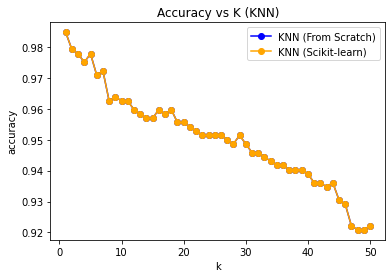

In [7]:
X = df.iloc[:, :21].values

k_accuracy_scratch = []
k_accuracy_sklearn = []

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, train_size=0.3, random_state=42)

for i in range(1, 51):
    model = KNNClassifier(k=i)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_accuracy_scratch.append((i, accuracy))
    print(f'Accuracy (Scratch) for k = {i}: {accuracy}')

    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_accuracy_sklearn.append((i, accuracy))
    print(f'Accuracy (Sklearn) for k = {i}: {accuracy}')

k_accuracy_scratch = np.array(k_accuracy_scratch)
k_accuracy_sklearn = np.array(k_accuracy_sklearn)

plt.plot(k_accuracy_scratch[:, 0], k_accuracy_scratch[:, 1],
         label='KNN (From Scratch)', marker='o', linestyle='-', color='blue')
plt.plot(k_accuracy_sklearn[:, 0], k_accuracy_sklearn[:, 1],
         label='KNN (Scikit-learn)', marker='o', linestyle='-', color='orange')


plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy vs K (KNN)')
plt.legend()
plt.show()

from above plot we can see that KNN Classifier build from scratch is performing same as the sklearn KNN Classifier. This is because sklearn KNN Classifier uses the same algorithm as we have used.

Text(0, 0.5, 'Accuracy')

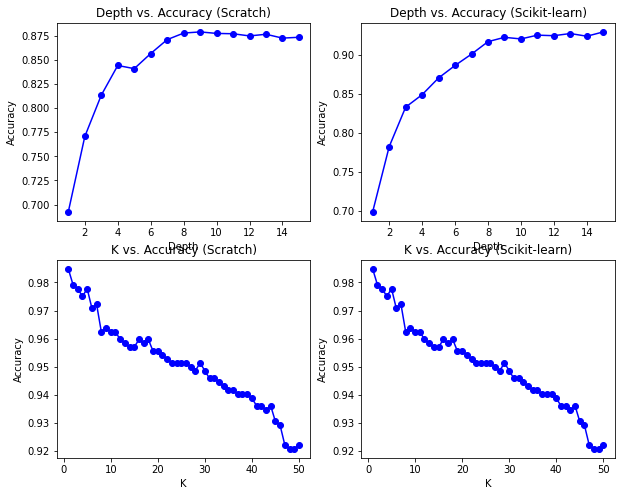

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(depth_accuracy_scratch[:, 0],
               depth_accuracy_scratch[:, 1], marker='o', color='b')
axs[0, 0].set_title('Depth vs. Accuracy (Scratch)')
axs[0, 0].set_xlabel('Depth')
axs[0, 0].set_ylabel('Accuracy')

axs[0, 1].plot(depth_accuracy_sklearn[:, 0],
               depth_accuracy_sklearn[:, 1], marker='o', color='b')
axs[0, 1].set_title('Depth vs. Accuracy (Scikit-learn)')
axs[0, 1].set_xlabel('Depth')
axs[0, 1].set_ylabel('Accuracy')

axs[1, 0].plot(k_accuracy_scratch[:,0], k_accuracy_scratch[:,1], marker='o', color='b')
axs[1, 0].set_title('K vs. Accuracy (Scratch)')
axs[1, 0].set_xlabel('K')
axs[1, 0].set_ylabel('Accuracy')

axs[1, 1].plot(k_accuracy_sklearn[:, 0],
               k_accuracy_sklearn[:, 1], marker='o', color='b')
axs[1, 1].set_title('K vs. Accuracy (Scikit-learn)')
axs[1, 1].set_xlabel('K')
axs[1, 1].set_ylabel('Accuracy')